# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [1]:
# For some reasons TF isn't working with my GPU, so I disable it
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

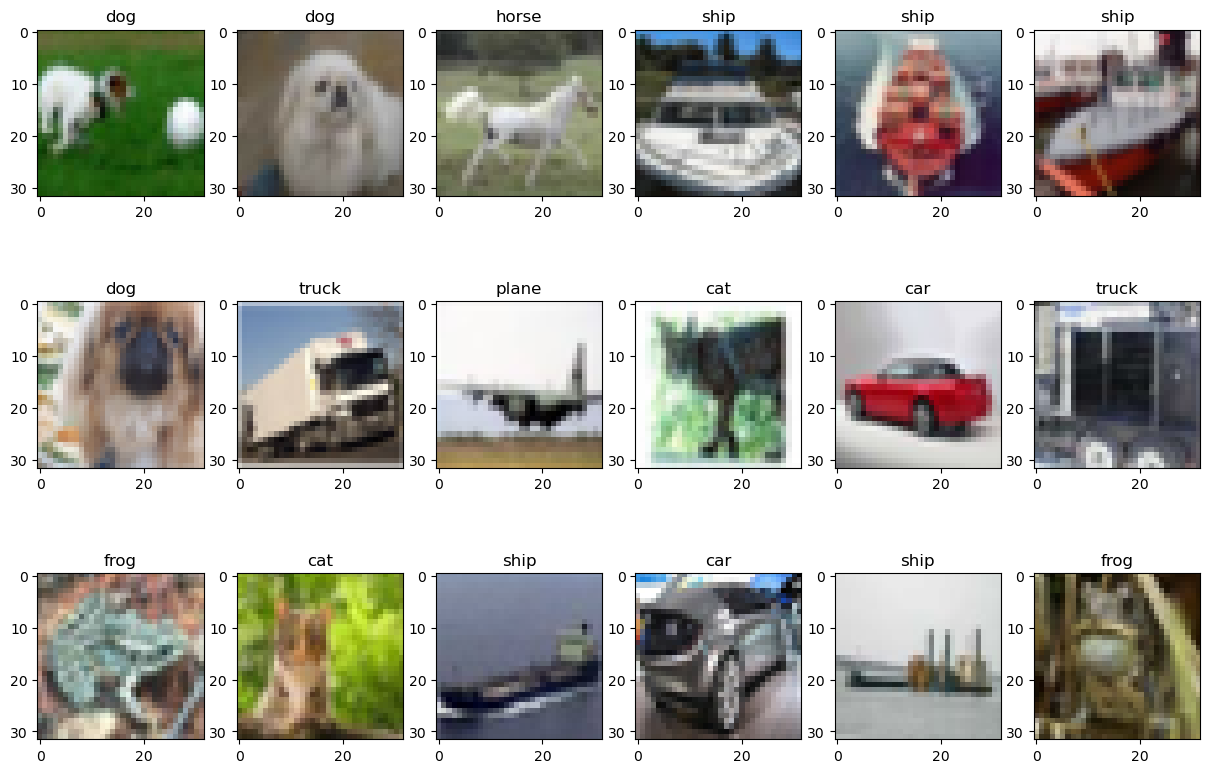

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, len(y_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

(Text(0.5, 0, 'Classes'), Text(0, 0.5, 'Counts'))

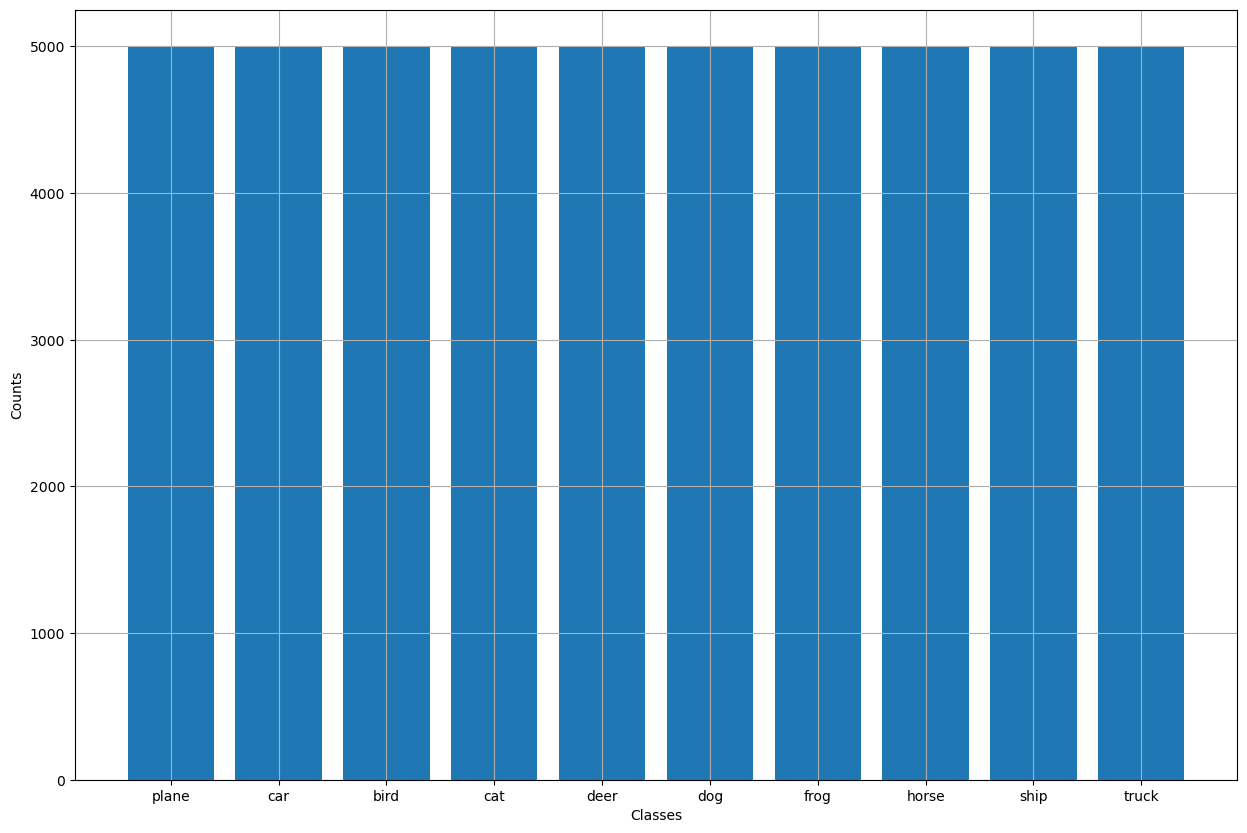

In [3]:
# Compute the class histogram
from collections import Counter
hist = Counter(np.transpose(y_train)[0])
hist = dict(zip(classes.values(), list(hist.values())))

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Classes'), plt.ylabel('Counts')

`Perfect! dataset is absolutely balanced`

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [4]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [5]:
# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0     

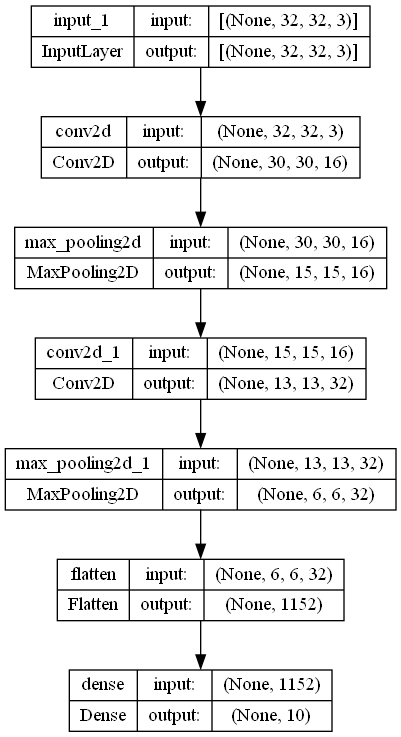

In [6]:
# Plot the model
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

### Step 3: Training

Compile the model and train it.

In [7]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
352/352 [==============================] - 8s 22ms/step - loss: 1.7608 - accuracy: 0.3743 - val_loss: 1.5792 - val_accuracy: 0.4478
Epoch 2/25
352/352 [==============================] - 8s 22ms/step - loss: 1.4396 - accuracy: 0.4948 - val_loss: 1.3581 - val_accuracy: 0.5216
Epoch 3/25
352/352 [==============================] - 8s 22ms/step - loss: 1.3366 - accuracy: 0.5322 - val_loss: 1.2973 - val_accuracy: 0.5550
Epoch 4/25
352/352 [==============================] - 8s 23ms/step - loss: 1.2697 - accuracy: 0.5536 - val_loss: 1.2375 - val_accuracy: 0.5714
Epoch 5/25
352/352 [==============================] - 8s 23ms/step - loss: 1.2248 - accuracy: 0.5742 - val_loss: 1.2100 - val_accuracy: 0.5778
Epoch 6/25
352/352 [==============================] - 8s 24ms/step - loss: 1.1854 - accuracy: 0.5878 - val_loss: 1.1551 - val_accuracy: 0.5998
Epoch 7/25
352/352 [==============================] - 8s 23ms/step - loss: 1.1537 - accuracy: 0.5989 - val_loss: 1.1516 - val_accuracy: 0.6006

Train Acc      0.6903555393218994
Validation Acc 0.6636000275611877


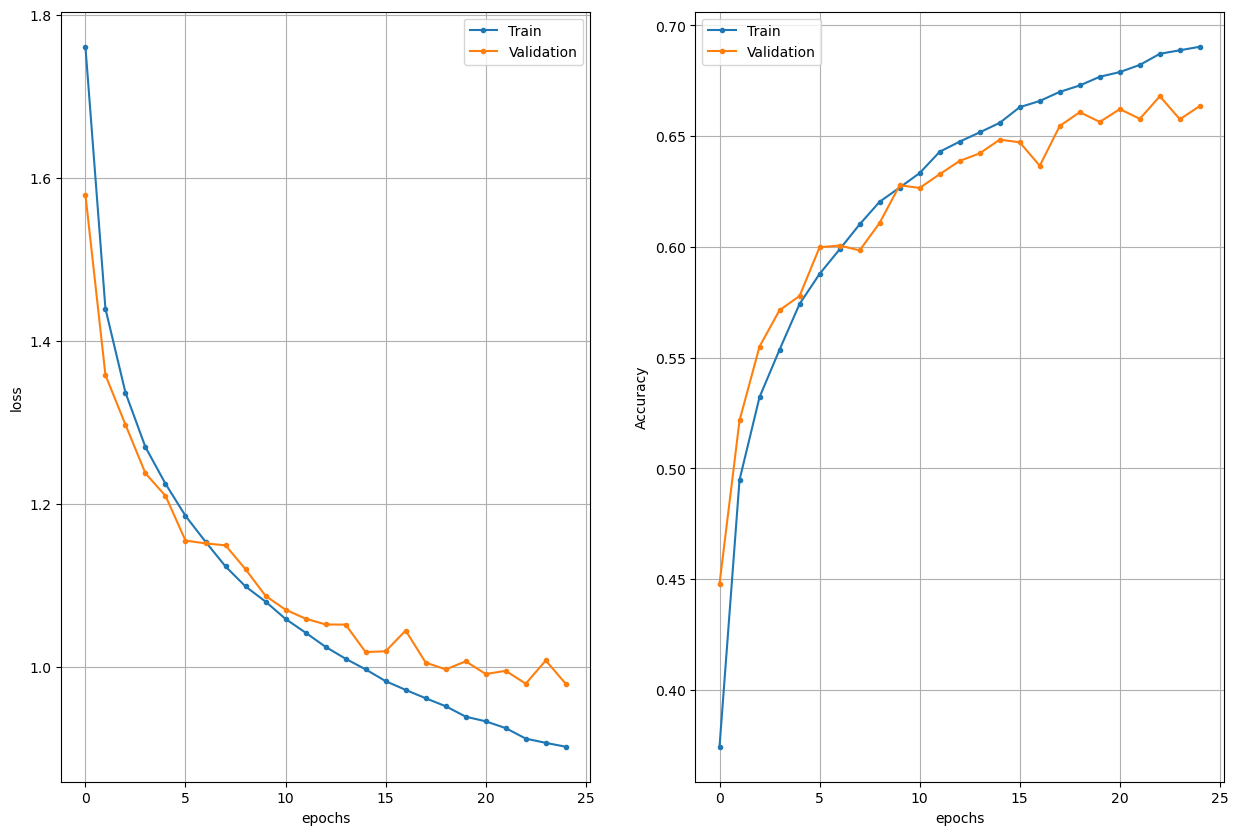

In [8]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [9]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

313/313 [==============================] - 1s 3ms/step
True [3 8 8 0 6]
Pred [3 1 8 0 4]
Pred [[3.33926245e-03 1.59537551e-04 1.42480088e-02 8.51738930e-01
  2.65372568e-03 5.87762594e-02 2.94557717e-02 1.35791849e-03
  3.58460322e-02 2.42449786e-03]
 [3.98972817e-02 7.13602722e-01 1.35306967e-04 1.05083632e-06
  2.46956074e-06 3.31768817e-08 2.49080927e-07 1.90493756e-06
  2.27231473e-01 1.91274416e-02]
 [1.74318433e-01 2.04051435e-01 1.20903095e-02 1.97475264e-03
  1.50235919e-02 5.95858903e-04 1.59977775e-04 1.56962276e-02
  5.10343909e-01 6.57455400e-02]
 [7.54230678e-01 2.74129454e-02 2.35064956e-03 2.01496965e-04
  6.20995369e-03 1.66040445e-05 9.79298202e-05 1.84987171e-03
  2.04582810e-01 3.04700830e-03]
 [7.72782587e-05 4.76877321e-04 2.62985732e-02 7.96569586e-02
  4.49902475e-01 7.77872652e-03 4.35050011e-01 1.69654959e-04
  2.56939355e-04 3.32492200e-04]]
(10000, 10)


In [10]:
# Compute and print the accuracy for each class
y_pred = np.argmax(y_pred, axis=1)

for class_id, class_name in classes.items():
    mask = y_true == class_id
    tp = np.sum(y_pred[mask] == class_id)
    total = np.sum(mask)
    acc = tp/total
    print(class_name, acc)

plane 0.714
car 0.799
bird 0.578
cat 0.467
deer 0.518
dog 0.554
frog 0.705
horse 0.751
ship 0.693
truck 0.736


In [11]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.0042 - accuracy: 0.6515
Test loss   1.0041614770889282
Test metric 0.6514999866485596


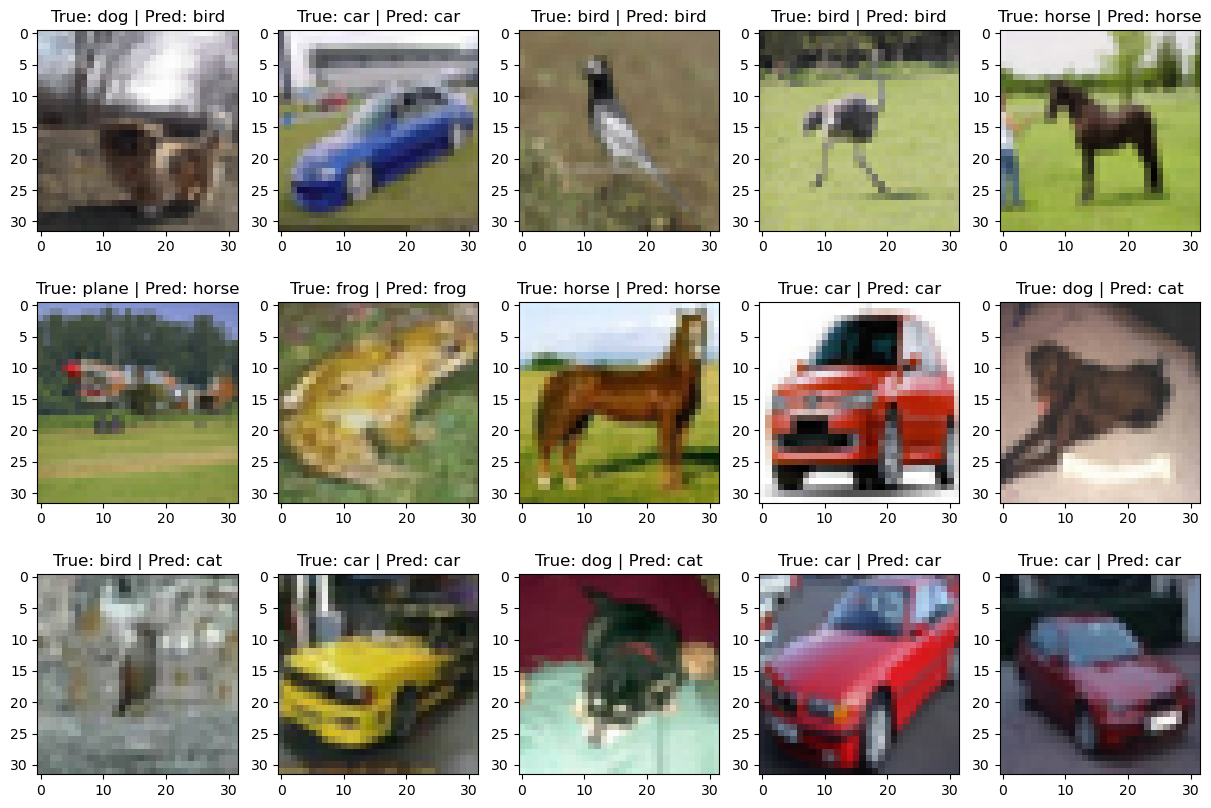

In [12]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(y_pred))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* What is the overall accuracy of the classifier?

`It's 65,15% - rather bad accuracy.`

* What modifications would you do in order to improve the classification accuracy?

`1. increase the epochs count (+ maybe pick a better batch size)`

`2. Make a dynamic range of the dataset images a little bit better`

`3. Add more layers to the network model`

`4. [in the next lessons] Regularization: batch normalization, data augmentation, dropout, weight decay etc.`

* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

`Here we go. Let's try to add the convolutional + pool layers`

Dataset has been loaded and normalized..
CNN has been compiled..
Epoch 1/25
352/352 [==============================] - 8s 22ms/step - loss: 1.7066 - accuracy: 0.3923 - val_loss: 1.5323 - val_accuracy: 0.4674
Epoch 2/25
352/352 [==============================] - 8s 23ms/step - loss: 1.3944 - accuracy: 0.5087 - val_loss: 1.3057 - val_accuracy: 0.5446
Epoch 3/25
352/352 [==============================] - 8s 23ms/step - loss: 1.2755 - accuracy: 0.5565 - val_loss: 1.2366 - val_accuracy: 0.5718
Epoch 4/25
352/352 [==============================] - 8s 24ms/step - loss: 1.2062 - accuracy: 0.5805 - val_loss: 1.1783 - val_accuracy: 0.5938
Epoch 5/25
352/352 [==============================] - 10s 27ms/step - loss: 1.1568 - accuracy: 0.6009 - val_loss: 1.1381 - val_accuracy: 0.6010
Epoch 6/25
352/352 [==============================] - 9s 26ms/step - loss: 1.1127 - accuracy: 0.6150 - val_loss: 1.0998 - val_accuracy: 0.6166
Epoch 7/25
352/352 [==============================] - 9s 25ms/step - loss: 1

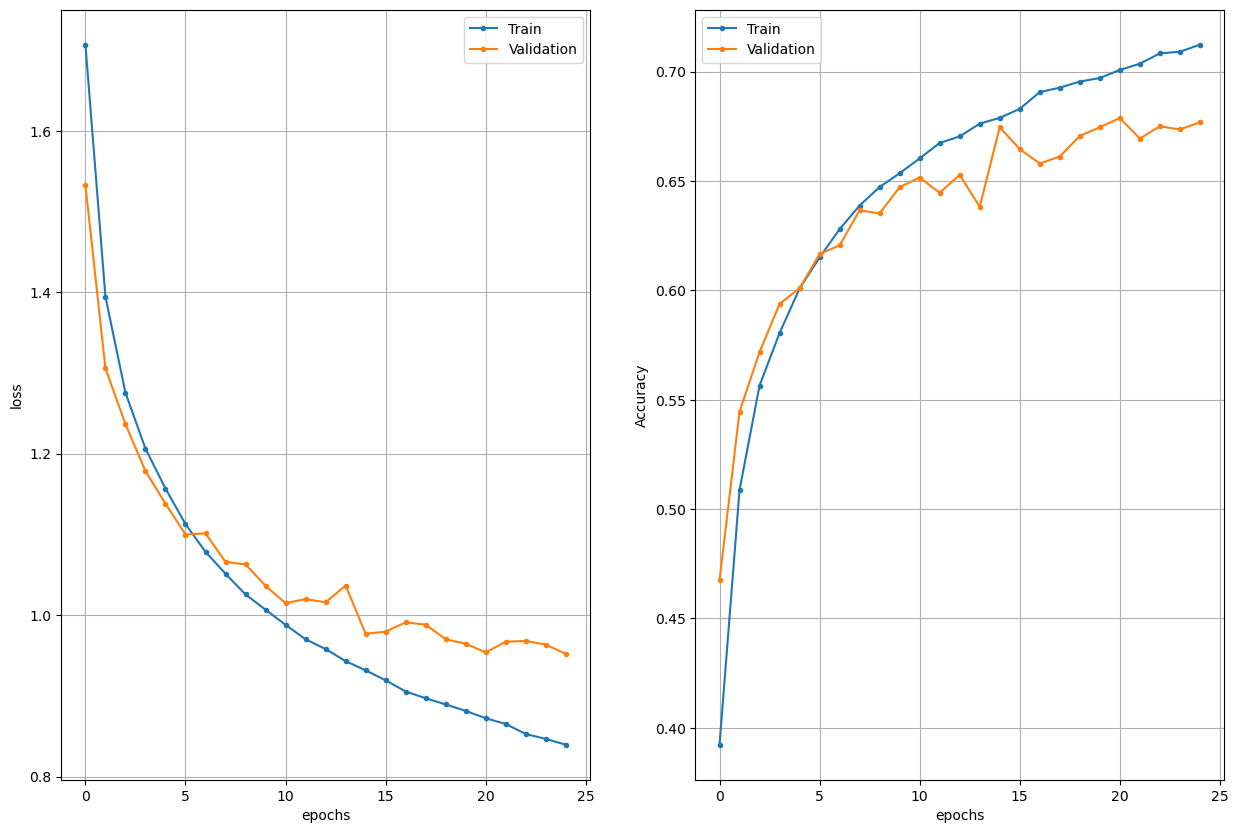

In [51]:
# Reload the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print("Dataset has been loaded and normalized..")

# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(8, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print("CNN has been compiled..")

# Train the model
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

66,75% - a little bit better, but not good enough. Let's try to add more different layers..

Dataset has been loaded and normalized..
CNN has been compiled..
Epoch 1/25
352/352 [==============================] - 103s 291ms/step - loss: 1.6655 - accuracy: 0.4276 - val_loss: 1.3258 - val_accuracy: 0.5444
Epoch 2/25
352/352 [==============================] - 107s 304ms/step - loss: 1.2389 - accuracy: 0.5627 - val_loss: 1.1160 - val_accuracy: 0.6112
Epoch 3/25
352/352 [==============================] - 100s 284ms/step - loss: 1.1055 - accuracy: 0.6122 - val_loss: 1.1052 - val_accuracy: 0.6224
Epoch 4/25
352/352 [==============================] - 100s 284ms/step - loss: 1.0145 - accuracy: 0.6419 - val_loss: 0.9859 - val_accuracy: 0.6602
Epoch 5/25
352/352 [==============================] - 103s 292ms/step - loss: 0.9279 - accuracy: 0.6744 - val_loss: 0.9583 - val_accuracy: 0.6708
Epoch 6/25
352/352 [==============================] - 101s 288ms/step - loss: 0.8664 - accuracy: 0.6962 - val_loss: 0.9445 - val_accuracy: 0.6712
Epoch 7/25
352/352 [==============================] - 101s 

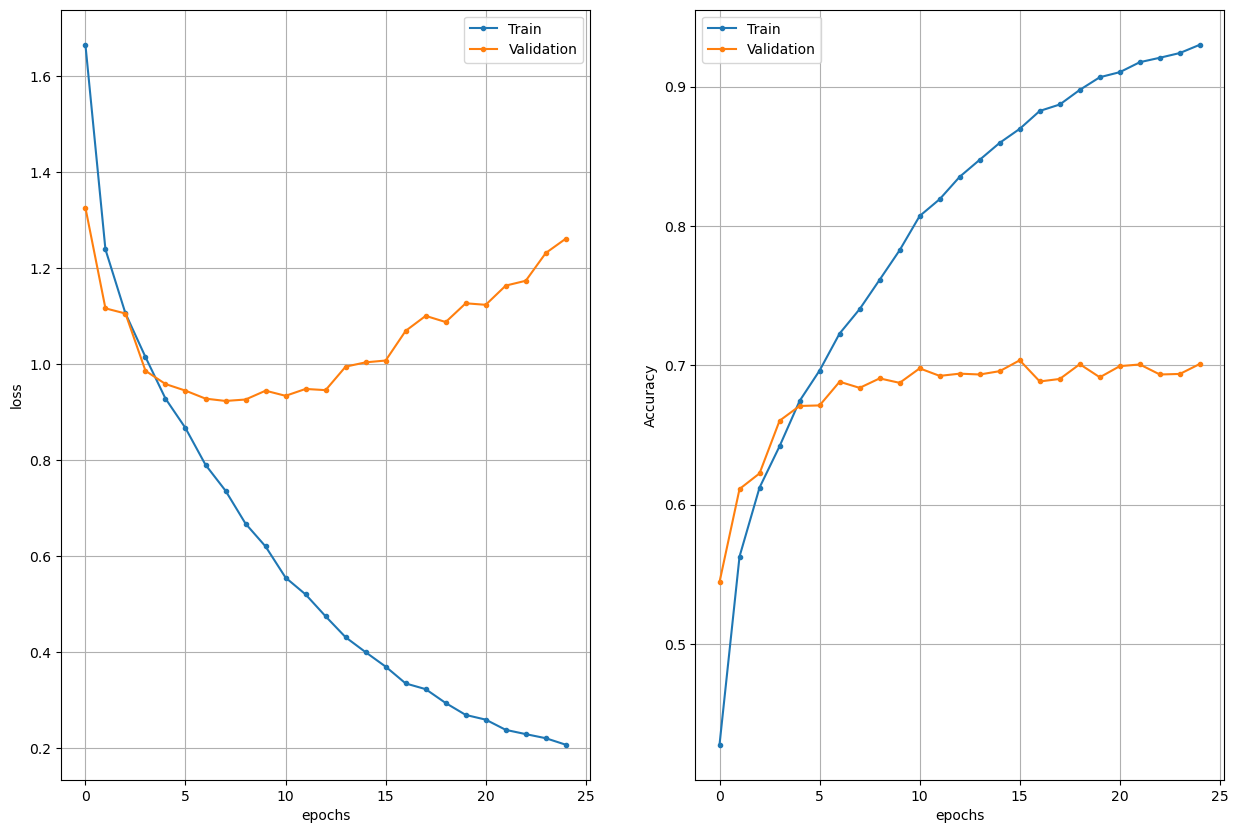

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

# Reload the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Dataset params
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print("Dataset has been loaded and normalized..")

# Build the classifier
inputs = Input(shape=(size, size, 3))

# conv1
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs)
net = Conv2D(64, kernel_size=(3, 3), activation="relu")(inputs)

# conv2
net = Conv2D(128, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(128, kernel_size=(2, 2), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.25)(net)

# dense
net = Flatten()(net)
net = Dense(1500, activation="relu")(net)
net = Dropout(0.5)(net)

outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print("CNN has been compiled..")

# Train the model
start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

68,12% - still a little better but it takes more time. Judging by the graph, there is an **overfitting** problem